# Eigenvalues and Eigenvectors and PCA

## Eigenvalues and Eigenvectors

In [1]:
import numpy as np
x = np.array([2.5,0.5,2.2,1.9,3.1,2.3,2.0,1.0,1.5,1.1])
y = np.array([2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9])
x_bar = np.mean(x)
y_bar = np.mean(y)
x = x - x_bar
y = y - y_bar
A = np.column_stack((x,y))
print (A)
print (len(y))
lunghezza = len(y) -1

[[ 0.69  0.49]
 [-1.31 -1.21]
 [ 0.39  0.99]
 [ 0.09  0.29]
 [ 1.29  1.09]
 [ 0.49  0.79]
 [ 0.19 -0.31]
 [-0.81 -0.81]
 [-0.31 -0.31]
 [-0.71 -1.01]]
10


In [2]:
print (A)
AT = (A.T)
print (AT)
C = AT.dot(A)
print (C)
VarCovMatrix = C / lunghezza
print (VarCovMatrix)
c = np.cov(A)

[[ 0.69  0.49]
 [-1.31 -1.21]
 [ 0.39  0.99]
 [ 0.09  0.29]
 [ 1.29  1.09]
 [ 0.49  0.79]
 [ 0.19 -0.31]
 [-0.81 -0.81]
 [-0.31 -0.31]
 [-0.71 -1.01]]
[[ 0.69 -1.31  0.39  0.09  1.29  0.49  0.19 -0.81 -0.31 -0.71]
 [ 0.49 -1.21  0.99  0.29  1.09  0.79 -0.31 -0.81 -0.31 -1.01]]
[[5.549 5.539]
 [5.539 6.449]]
[[0.61655556 0.61544444]
 [0.61544444 0.71655556]]


In [3]:
from scipy import linalg as la
from scipy.linalg import eigh # alternative object to library to numpy.linalg.eig object to calculate eig 

print (la.eigvalsh(VarCovMatrix))

[0.0490834  1.28402771]


In [4]:
eigenvalues, eigenvectors  = np.linalg.eig(VarCovMatrix)
print (eigenvectors)
print (eigenvalues)

[[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]
[0.0490834  1.28402771]


In [5]:
import copy as cp

eigenvectorsS = cp.deepcopy(eigenvectors)
eigenvectors[:,0] = eigenvectorsS[:,1]
eigenvectors[:,1] = eigenvectorsS[:,0]

eigenvaluesS = cp.deepcopy(eigenvalues)
eigenvalues[0] = eigenvaluesS[1]
eigenvalues[1] = eigenvaluesS[0]
print (eigenvectors)
print (eigenvalues)

[[-0.6778734  -0.73517866]
 [-0.73517866  0.6778734 ]]
[1.28402771 0.0490834 ]


In [6]:
Lambda = np.diag(eigenvalues)
print (Lambda)

[[1.28402771 0.        ]
 [0.         0.0490834 ]]


In [7]:
print (VarCovMatrix.dot(eigenvectors[:,0]))
print (eigenvalues[0]*eigenvectors[:,0])

[-0.87040823 -0.94398977]
[-0.87040823 -0.94398977]


In [8]:
print (VarCovMatrix.dot(eigenvectors[:,1]))
print (eigenvalues[1]*eigenvectors[:,1])

[-0.03608507  0.03327233]
[-0.03608507  0.03327233]


In [9]:
print (VarCovMatrix.dot(eigenvectors))
print (eigenvectors.dot(Lambda))

[[-0.87040823 -0.03608507]
 [-0.94398977  0.03327233]]
[[-0.87040823 -0.03608507]
 [-0.94398977  0.03327233]]


In [10]:
# All eigenvectors are orthonormal ALREADY 
print (np.linalg.norm(eigenvectors[:,0]))
print (np.linalg.norm(eigenvectors[:,1]))

0.9999999999999999
0.9999999999999999


In [11]:
# U * U.T is the identity
print (eigenvectors.dot(eigenvectors.T))

[[1. 0.]
 [0. 1.]]


In [12]:
# Transpose and Inverse are the same
print (np.linalg.inv(eigenvectors))
print (eigenvectors.T)

[[-0.6778734  -0.73517866]
 [-0.73517866  0.6778734 ]]
[[-0.6778734  -0.73517866]
 [-0.73517866  0.6778734 ]]


## Principal Components 

We are missing an algo that sort the eigenValues according to the max
and then amend the eigenvectors based upon the according sorted eigenValues

Below I did Manually

In [13]:
# The principla components are: 
# Before Rotation
print (VarCovMatrix)
# Now we rotate
P = VarCovMatrix.dot(eigenvectors)
print (P)

[[0.61655556 0.61544444]
 [0.61544444 0.71655556]]
[[-0.87040823 -0.03608507]
 [-0.94398977  0.03327233]]


In [14]:
# If i do the following I recover the eigenvalues
print (np.matrix.round(P.T.dot(P),4))

[[1.6487 0.    ]
 [0.     0.0024]]


In [15]:
import math as ma

In [16]:
# the eigenvector element [0,0] is 
print (eigenvectors[0,0])
# We extract theta from cos(theta) =  eigenvector[0,0]
print (np.arccos(eigenvectors[0,0]))

print (ma.acos(eigenvectors[0,0]))
# and in degrees
print (ma.degrees(ma.acos(eigenvectors[0,0])))

-0.6778733985280117
2.315662457290723
2.315662457290723
132.6776855796517


In [17]:
# The Transformed data set can be calculated with
# 1  
eigenvectorsT = eigenvectors.T
Transf_A = eigenvectorsT.dot(A.T)
print (Transf_A.T)
print (" --------------------- ")
# or 2
Transf_A2 = A.dot(eigenvectors)
print (Transf_A2)

[[-0.82797019 -0.17511531]
 [ 1.77758033  0.14285723]
 [-0.99219749  0.38437499]
 [-0.27421042  0.13041721]
 [-1.67580142 -0.20949846]
 [-0.9129491   0.17528244]
 [ 0.09910944 -0.3498247 ]
 [ 1.14457216  0.04641726]
 [ 0.43804614  0.01776463]
 [ 1.22382056 -0.16267529]]
 --------------------- 
[[-0.82797019 -0.17511531]
 [ 1.77758033  0.14285723]
 [-0.99219749  0.38437499]
 [-0.27421042  0.13041721]
 [-1.67580142 -0.20949846]
 [-0.9129491   0.17528244]
 [ 0.09910944 -0.3498247 ]
 [ 1.14457216  0.04641726]
 [ 0.43804614  0.01776463]
 [ 1.22382056 -0.16267529]]


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

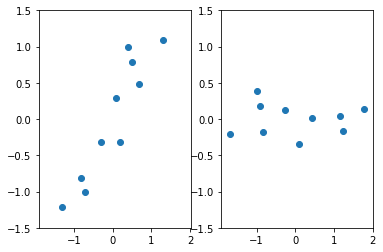

In [19]:
# and see the old vs translated data
xData_T = Transf_A2[:,0]
yData_T = Transf_A2[:,1]

xData = A[:,0]
yData = A[:,1]

fig,(axleft,axright) = plt.subplots(nrows=1,ncols=2, sharex=True)
axleft.scatter(xData, yData)
axleft.set_ylim(-1.5,1.5)
axright.scatter(xData_T, yData_T)
axright.set_ylim(-1.5,1.5)
plt.show()

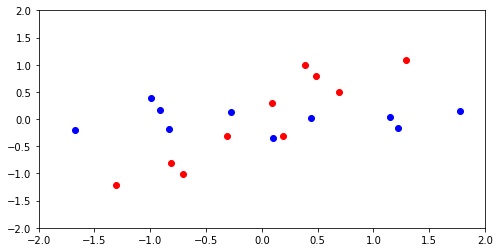

In [20]:
# and again as
fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(xData,   yData,  color="r")
ax.scatter(xData_T, yData_T,color="b")
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
plt.show()

In [21]:
# This code is from the book Machine Learning in Action, page 273.
# the code creates the main axe, which is then plotted on the original 
# The main axe is called "reconMat"
# The code also outputs the transformed x in "Transf_A2" see above and are exactly the same!
# the sorting is done in the function
from numpy import *
def pca(dataMat, topNfeat=9999999):
    meanVals = mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals
    covMat = cov(meanRemoved, rowvar=0)
    eigVals,eigVects = linalg.eig(mat(covMat))
    eigValInd = argsort(eigVals)
    eigValInd = eigValInd[:-(topNfeat+1):-1]
    redEigVects = eigVects[:,eigValInd]
    lowDDataMat = meanRemoved * redEigVects
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    return lowDDataMat, reconMat

In [22]:
# and we test it
a, b = pca(A,1)
print (a)
print (" -------------------------- ")
print (b)

[[-0.82797019]
 [ 1.77758033]
 [-0.99219749]
 [-0.27421042]
 [-1.67580142]
 [-0.9129491 ]
 [ 0.09910944]
 [ 1.14457216]
 [ 0.43804614]
 [ 1.22382056]]
 -------------------------- 
[[ 0.56125896  0.60870601]
 [-1.20497442 -1.30683911]
 [ 0.67258429  0.72944242]
 [ 0.18587995  0.20159364]
 [ 1.1359812   1.23201343]
 [ 0.61886391  0.67118069]
 [-0.06718365 -0.07286314]
 [-0.77587502 -0.84146502]
 [-0.29693982 -0.32204217]
 [-0.8295954  -0.89972675]]


In [23]:
'''fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(b[:,0],   b[:,1],  color="b")
ax.scatter(xData, yData,color="r")
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
plt.show()'''

'fig, ax = plt.subplots(figsize=(8, 4))\nax.scatter(b[:,0],   b[:,1],  color="b")\nax.scatter(xData, yData,color="r")\nax.set_xlim(-2,2)\nax.set_ylim(-2,2)\nplt.show()'